In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime

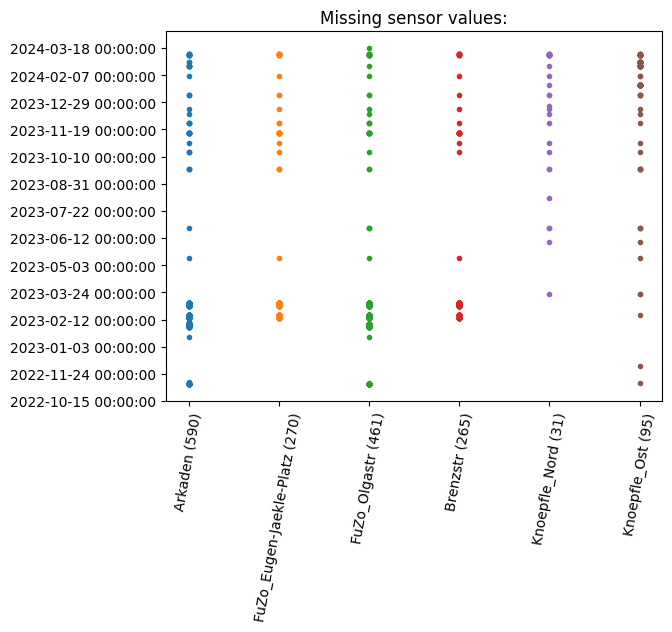

In [2]:
missingDatesForSensors = {}

with open("missing_sensor_values.json") as jsonFile:
    data = json.load(jsonFile)
    for sensorName, missingDates in data.items():
        
        missingDatesDateTime = list(map(lambda value: datetime.datetime.strptime(value, '%Y-%m-%d %H:%M:%S'), missingDates))
        missingDatesForSensors[sensorName] = list(set(map(lambda value: value.date(), missingDatesDateTime)))
        
        x = ["{0} ({1})".format(sensorName, len(missingDatesDateTime))] * len(missingDatesDateTime)
        plt.plot(x, missingDatesDateTime,'.')      

ax=plt.gca()
yfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.yaxis.set_major_formatter(yfmt)
ax.yaxis.set_major_locator(plt.MaxNLocator(16))
plt.xticks(rotation=80)
plt.title("Missing sensor values:")
plt.savefig('missing_sensor_values.png', bbox_inches="tight")
plt.show()
